<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Teoria de circuitos II

# Problema Desafio
#### Por: Rodrigo Cordova

**Se pide diseñar un filtro pasabajo que satisfaga la siguiente plantilla:**
* $\omega_p=500 hz$
* $\omega_s=1500 hz$
* $\alpha{max}=1 db$
* $\alpha{min}=18 db$

a) Determine si el siguiente diseño puede realizarse con una sola sección de segundo orden cuya respuesta de módulo es de máxima planicidad.

In [5]:
import math as m
import numpy as np
import scipy.signal as sig
import splane

import scipy.signal as signal
from scipy import signal as sig

from matplotlib import pyplot as plt
# un módulo adaptado a mis necesidades
from splane import bodePlot, pzmap

from IPython.display import Image


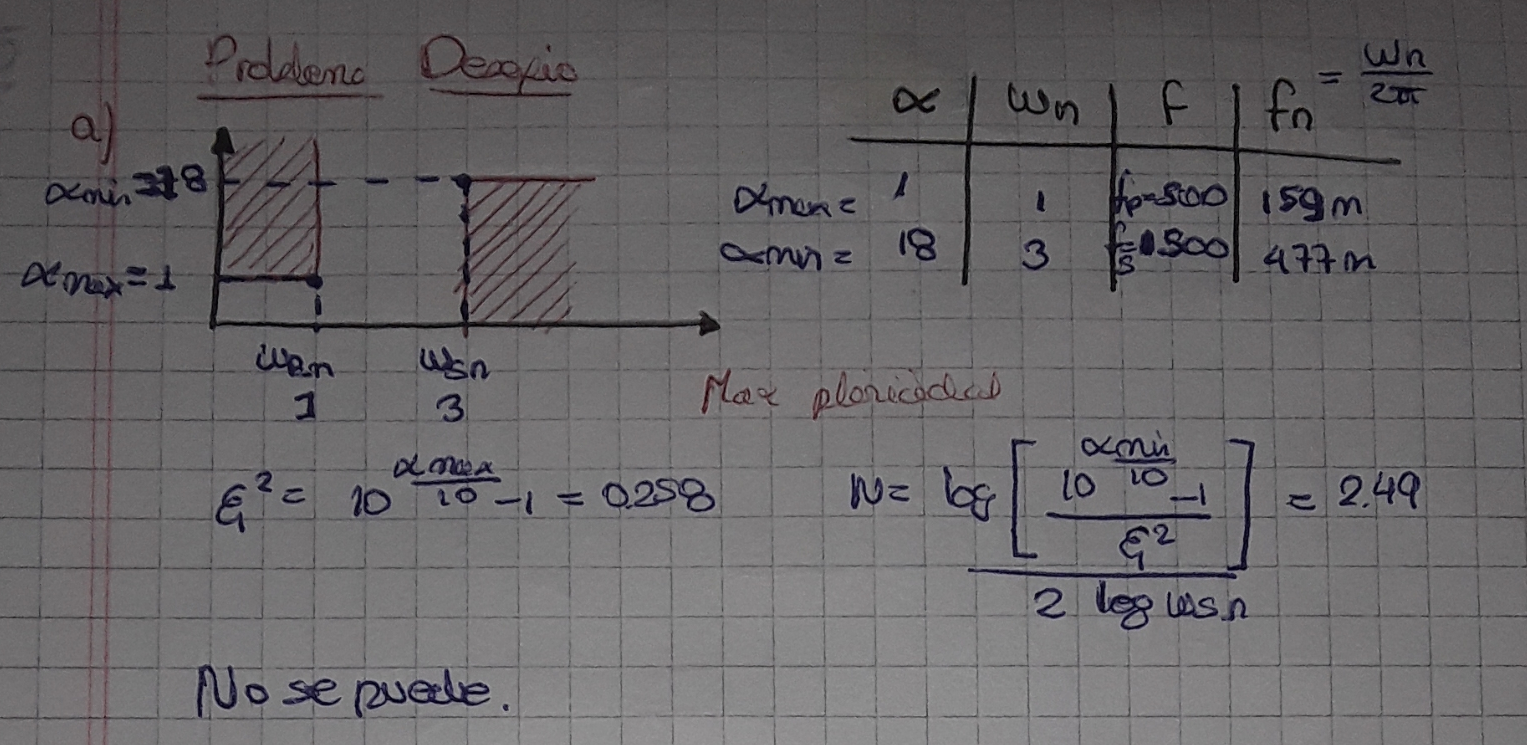

In [7]:
Image("Parte_a.png")

b) Si el mismo diseño se planteara mediante una aproximación Chebyshev, se pide:

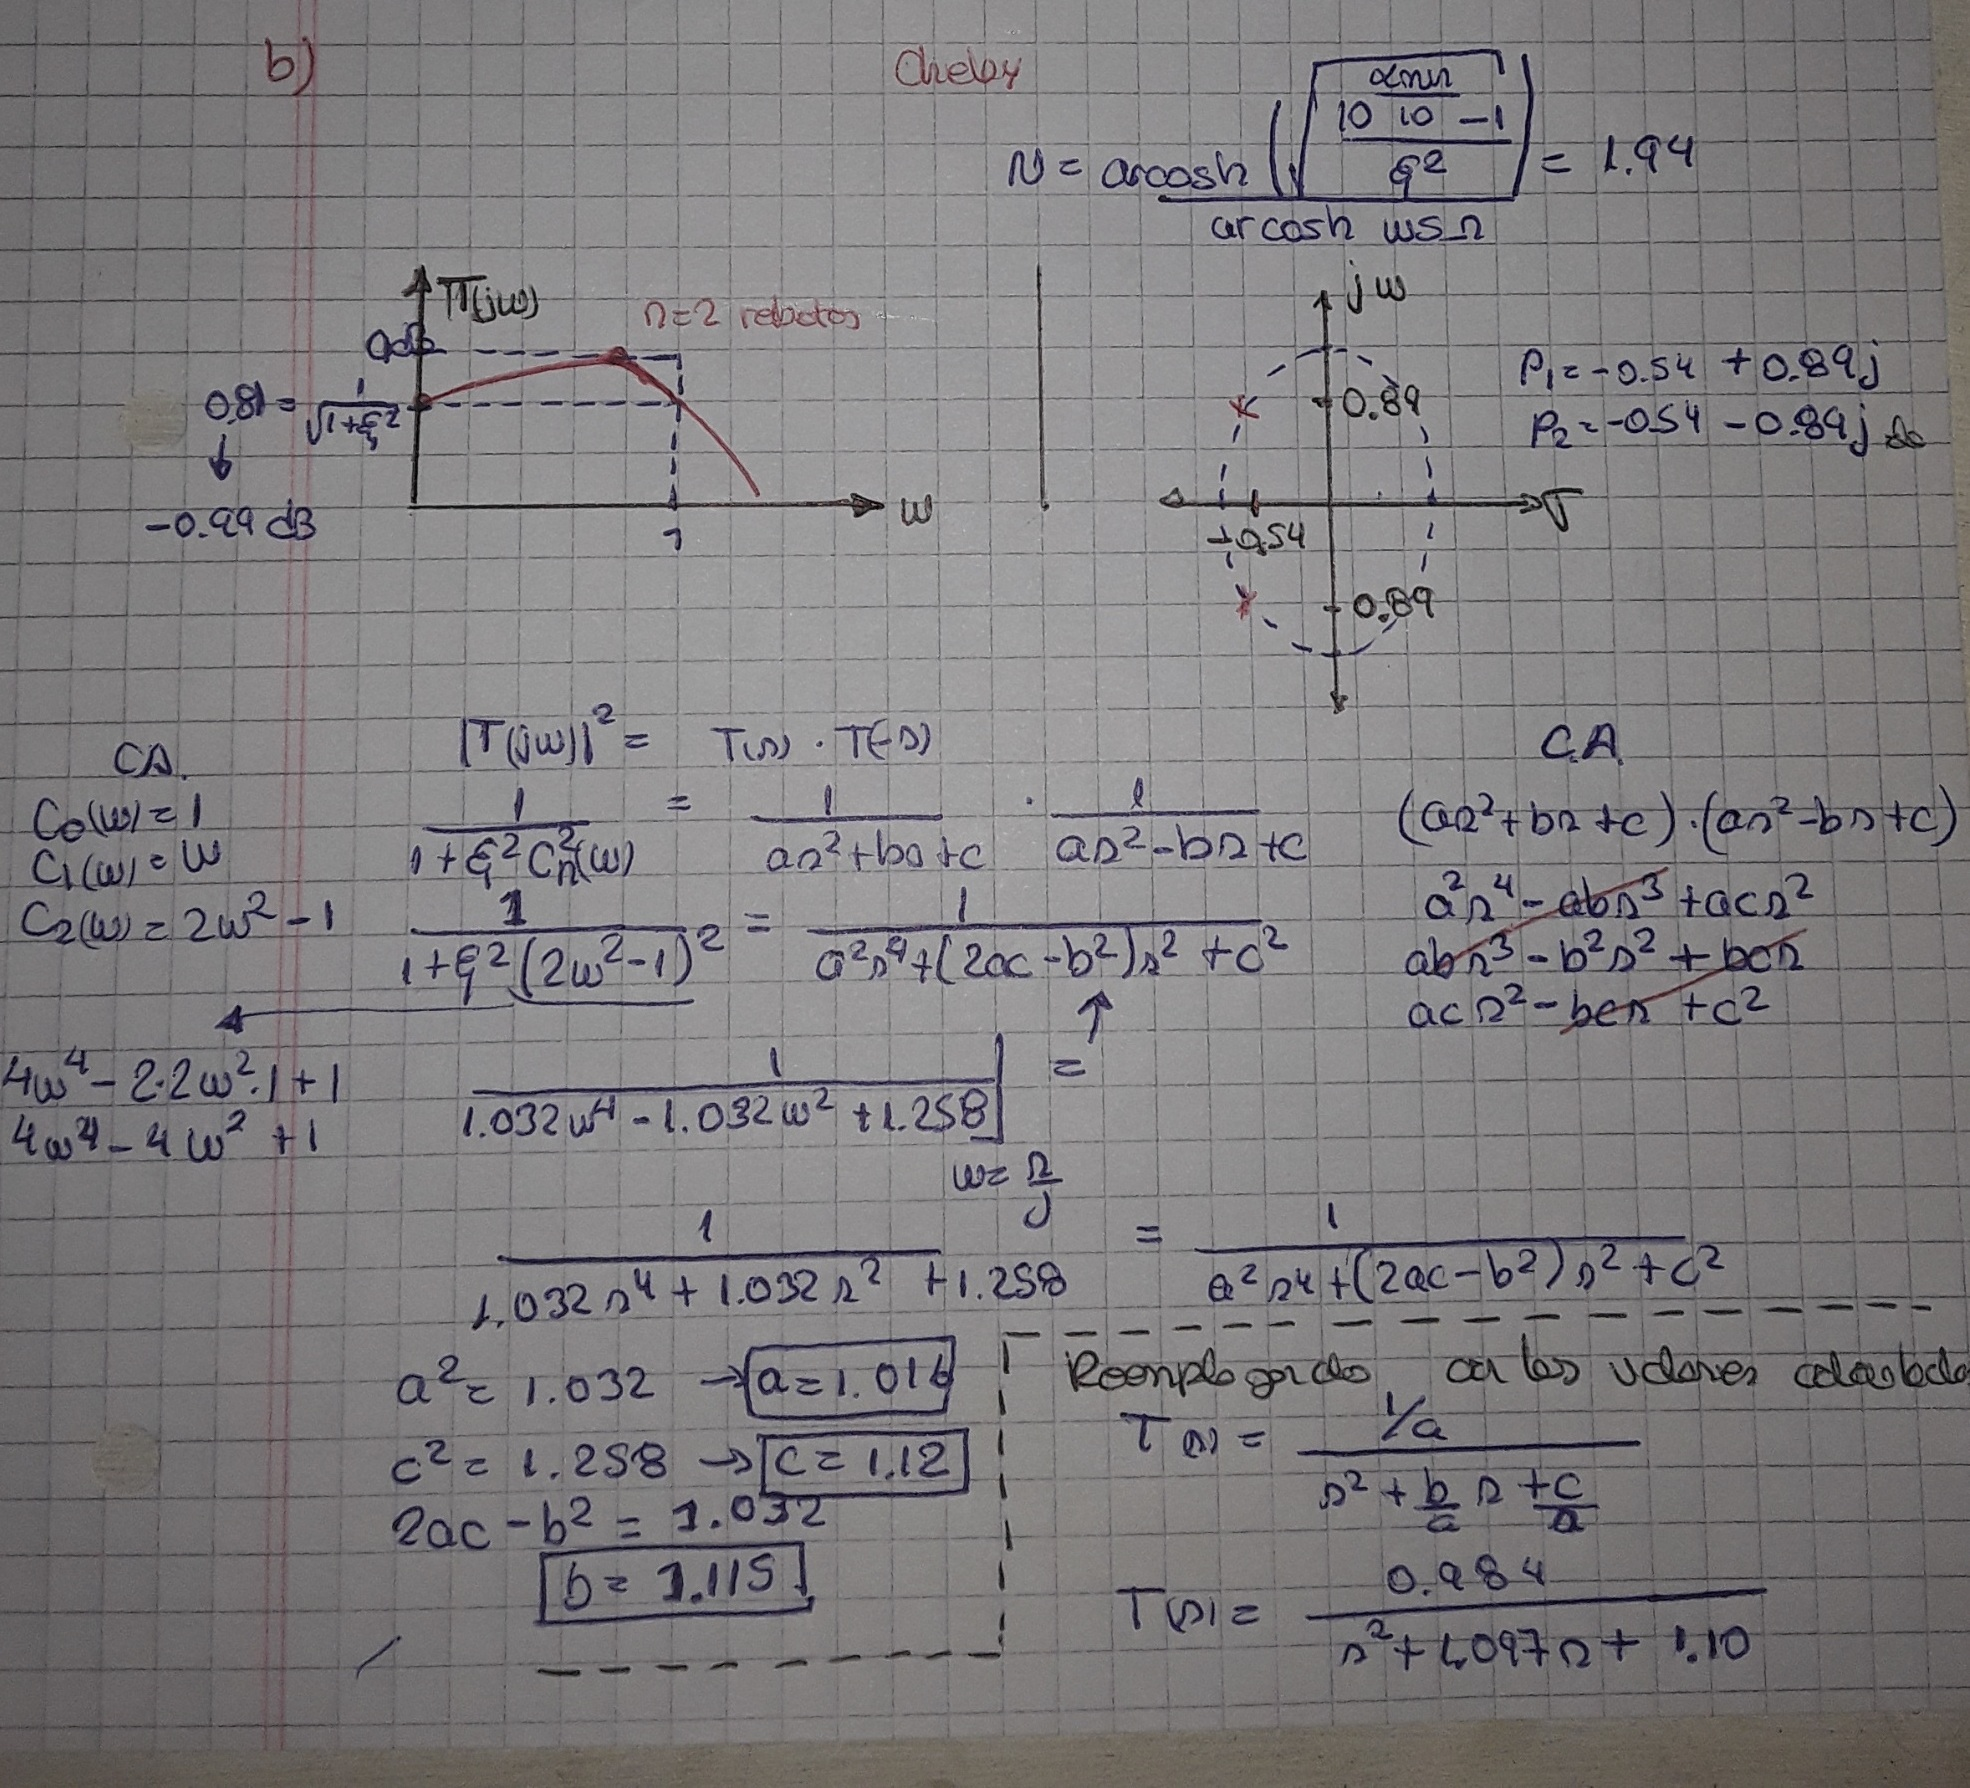

In [9]:
Image("Parte_b.jpg")

Calculo de los parametros epsilon y N con spyder

In [2]:


 # PRIMERA PARTE

#-------------------SE PUEDE EDITAR
alpha_max = 1    # dB
alpha_min = 18   # dB
w_p = 2 * 3.14 * (500)
w_s = 2 * 3.14 * (1500)
#-------------------

# Los valores de w normalizados
w_p_n = 1
w_s_n = w_s / w_p

epsilon = np.sqrt(m.pow(10, 0.1 * alpha_max) - 1)
#N=np.log10((10**(alpha_min/10)-1)/(epsilon**2))/(2*np.log10(w_s_n))
N = m.acosh(((m.pow(10, alpha_min * 0.1) - 1) / (m.pow(10, alpha_max * 0.1) - 1))**(1/2)) / ( m.acosh(w_s_n))
N = m.ceil(N)


print(f'epsilon: {epsilon}, N: {N}')

epsilon: 0.5088471399095875, N: 2


Como se obserban son los mismos resultados calculados teoricamente.

In [3]:
nn=N
z,p,k = sig.cheb1ap(nn, alpha_max)
num, den = sig.zpk2tf(z,p,k) 

roots = np.roots(den)
polos_etapa_1 = roots[0]  # Y su conjugado
parte_real = polos_etapa_1.real
w0_polo = abs(polos_etapa_1)
print(f'denominador : s^2+{-2*parte_real}*s+{w0_polo ** 2}')
print(f'numerador: {num[0]}')

denominador : s^2+1.0977343285639274*s+1.102510328053848
numerador: 0.9826133641801358


Tanto el numerador como el denominador corresponde a los de la transferencia hallada.

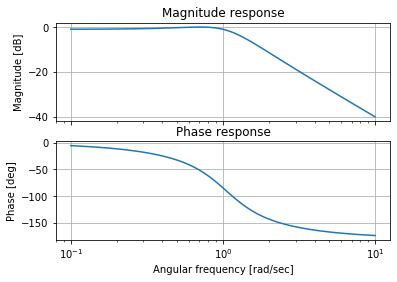

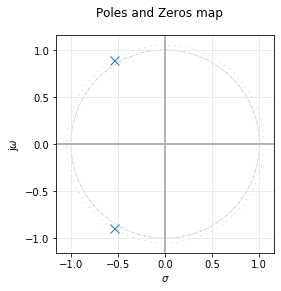

In [4]:
H = sig.TransferFunction( num, den )

# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.

_, axes_hdl = bodePlot(H)

# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas
plt.sca(axes_hdl[0])
#plt.ylim([-1,1])

plt.gca

pzmap(H)

plt.show()

c) Implemente el filtro solicitado mediante la siguiente red y corrobore su funcionamiento respecto a la plantilla de requerimientos.

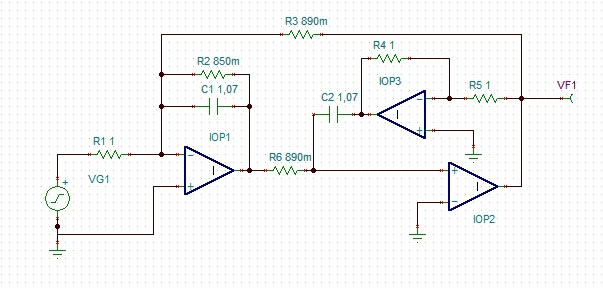

In [15]:
Image("Circuito.jpg")


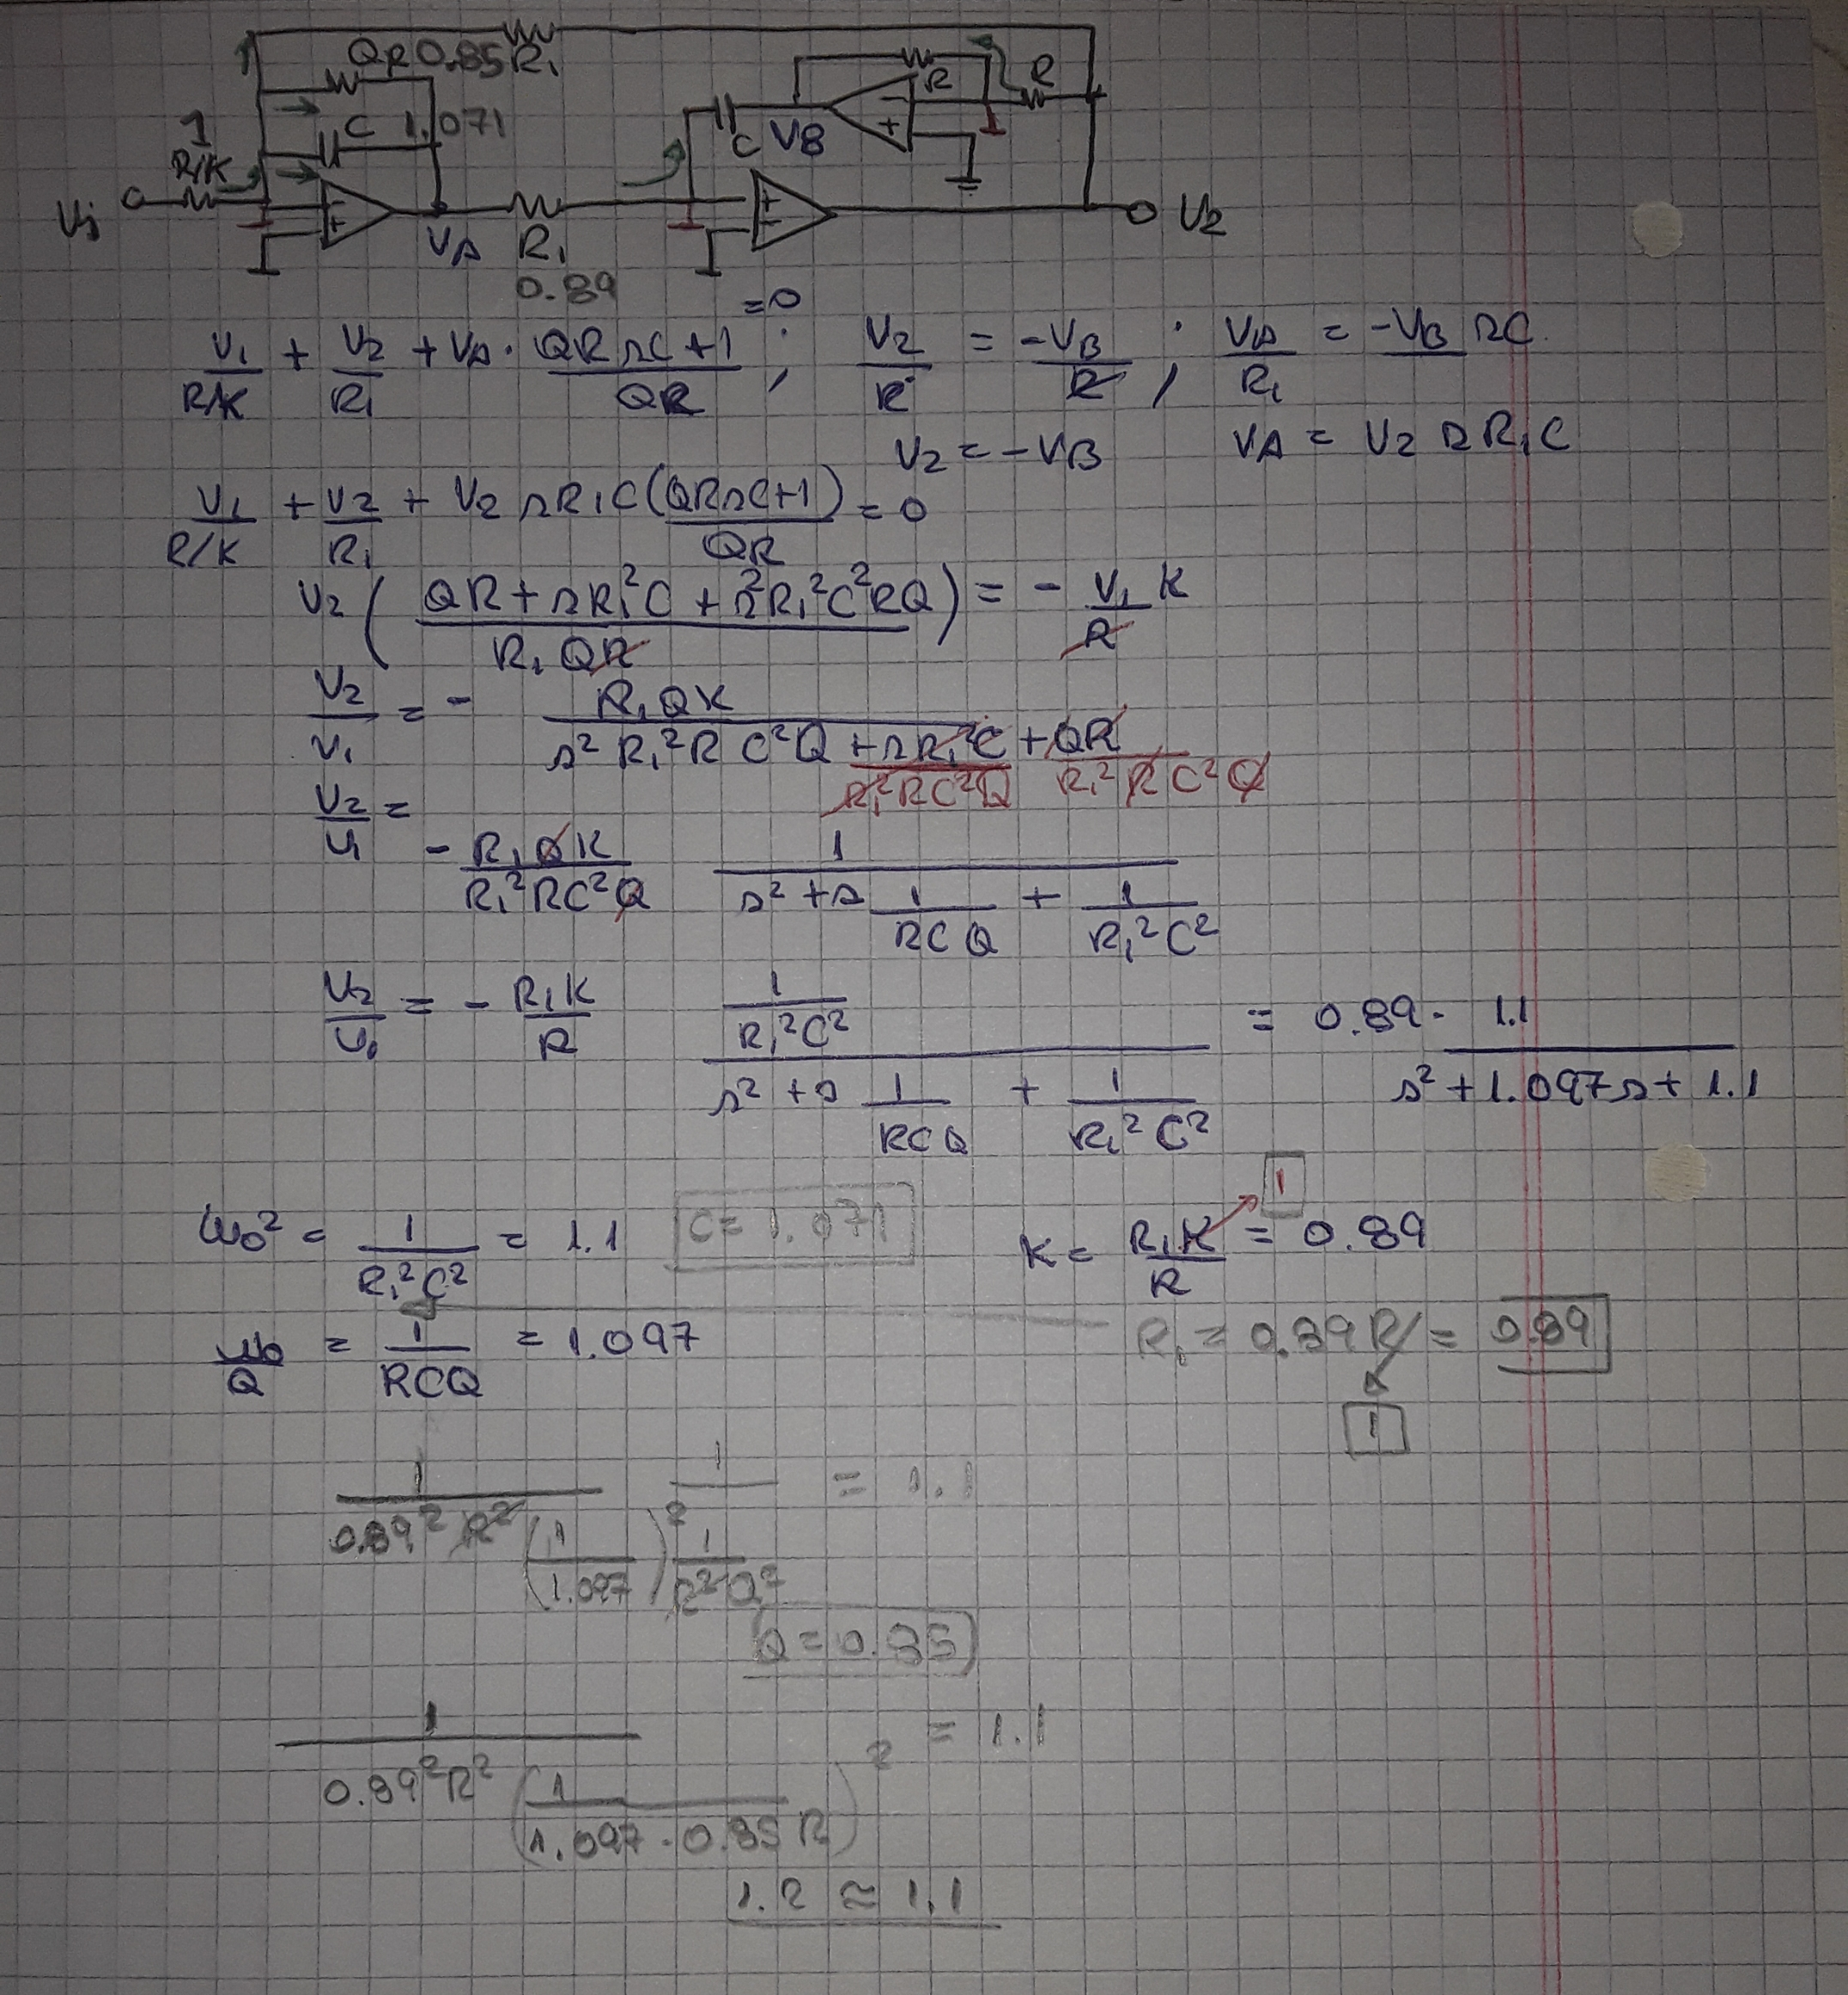

In [13]:
Image("Parte_c.jpg") 

Simulando los resultados nos da una transferencia esperada normalizada

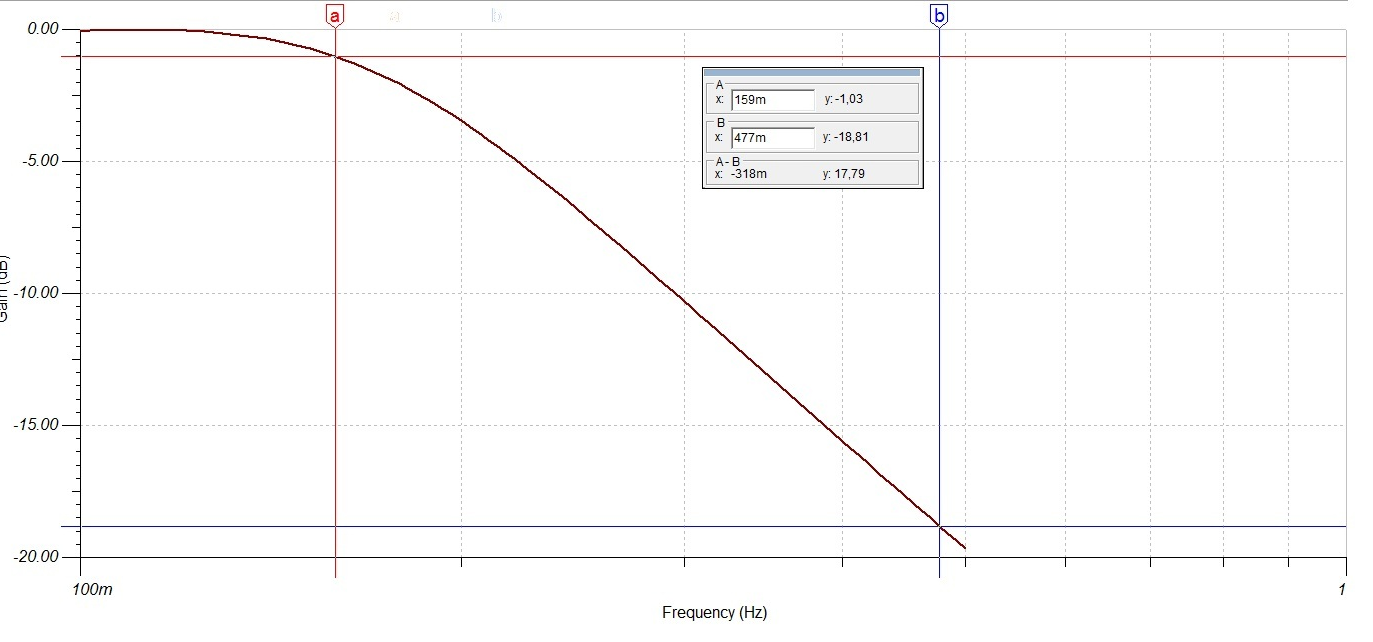

In [11]:
Image("Bodes.png")